In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from preprocessing import load_wisconsin_prepr

In [2]:
def find_best_model(model, parameters, X_train, y_train): 
    clf = GridSearchCV(model, parameters, scoring=('balanced_accuracy'), cv=StratifiedKFold())
    clf.fit(X_train, y_train)

    return clf

# Calculates the per-class accuracy given predicted and true output labels.
def class_accs(y_pred, y_true):
    acc0 = ((y_pred == y_true) & (y_true == 0)).sum() / (y_true == 0).sum()
    acc1 = ((y_pred == y_true) & (y_true == 1)).sum() / (y_true == 1).sum()
    return acc0, acc1

# Prints a summary of performance metrics given predicted and true output labels.
def print_metrics(y_pred, y_true):
    f1 = f1_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    acc0, acc1 = class_accs(y_pred, y_true)
    print(f'F1 = {f1}')
    print(f'Accuracy = {acc}')
    print(f'\tclass 0: {acc0}')
    print(f'\tclass 1: {acc1}')

def print_errors(clf, model_name, X_test, y_test):
    y_pred = clf.predict(X_test)
    
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print("Balanced accuracy ({}) = {}".format(model_name, bal_acc))
    print_metrics(y_pred, y_test)

In [3]:
X, y, feature_names = load_wisconsin_prepr()
seed = 3012

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# KNN classifier

In [4]:
model_name = "k-nearest neighbors"
parameters = {'n_neighbors': np.arange(1, 364), 'weights': ('uniform', 'distance')}
kNN = KNeighborsClassifier()

clf = find_best_model(kNN, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

clf.best_estimator_

Balanced accuracy (k-nearest neighbors) = 0.9565217391304348
F1 = 0.9714285714285714
Accuracy = 0.9649122807017544
	class 0: 0.9130434782608695
	class 1: 1.0


KNeighborsClassifier(n_neighbors=4)

# Decision tree classifier

In [5]:
model_name = "decision tree classifier"
parameters = {'criterion': ('gini', 'entropy'), 'min_samples_split': np.arange(2, 364)}
tr = DecisionTreeClassifier(random_state=seed)

clf = find_best_model(tr, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

clf.best_estimator_

Balanced accuracy (decision tree classifier) = 0.8759590792838874
F1 = 0.8955223880597014
Accuracy = 0.8771929824561403
	class 0: 0.8695652173913043
	class 1: 0.8823529411764706


DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       random_state=3012)

<AxesSubplot:>

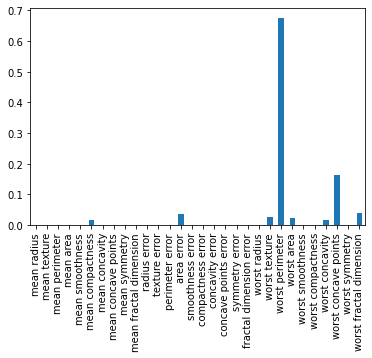

In [6]:
model = clf.best_estimator_
df = pd.Series(data=model.feature_importances_, index=feature_names)
df.plot.bar()

# Support vector classifier

In [7]:
model_name = "support vector classifier"
parameters = {'C': np.geomspace(0.01, 100, 41)}
svc = SVC(kernel="linear")

clf = find_best_model(svc, parameters, X_train, y_train)
print_errors(clf, model_name, X_test, y_test)

clf.best_estimator_

Balanced accuracy (support vector classifier) = 0.9526854219948849
F1 = 0.9635036496350365
Accuracy = 0.956140350877193
	class 0: 0.9347826086956522
	class 1: 0.9705882352941176


SVC(C=0.07943282347242814, kernel='linear')

<AxesSubplot:>

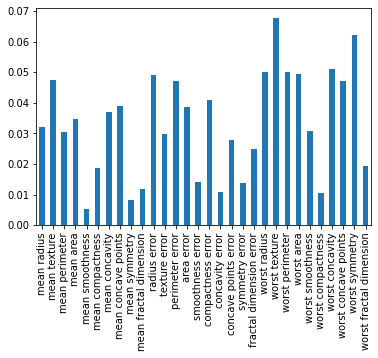

In [8]:
model = clf.best_estimator_
df = pd.Series(data=np.abs(model.coef_[0]) / np.sum(np.abs(model.coef_[0])), index=feature_names)
df.plot.bar()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5161fece-8ef6-4825-9ea6-16ebba884483' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>